...

✅ CSF mask test passed
✅ GM mask test passed
✅ WM mask test passed


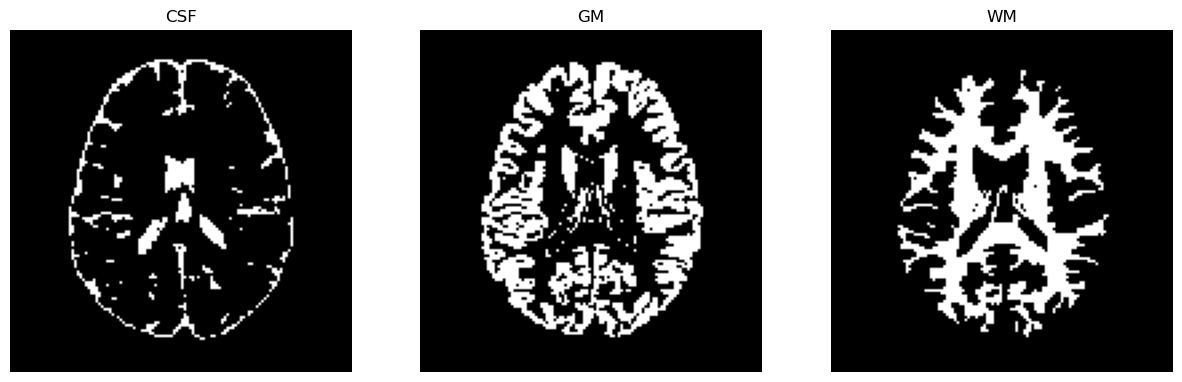

.
----------------------------------------------------------------------
Ran 4 tests in 0.142s

OK


In [1]:
import unittest
import numpy as np
from lab01 import *

class TestLab01(unittest.TestCase):

    def setUp(self):
        self.op = Lab01_op()
        self.op.load_data("digital_brain_phantom.mat")

    def test_get_csf_mask(self):
        mask = self.op.get_csf_mask()
        self.assertIsInstance(mask, np.ndarray, "CSF mask should be a NumPy array")
        self.assertEqual(mask.shape, self.op.label.shape, "CSF mask shape mismatch")
        self.assertTrue(np.all(np.isin(mask, [0, 1])), "CSF mask should only contain 0 and 1")
        self.assertEqual(np.sum(mask), np.sum(self.op.label == 1), "CSF mask pixel count mismatch")
        print("✅ CSF mask test passed")

    def test_get_gm_mask(self):
        mask = self.op.get_gm_mask()
        self.assertIsInstance(mask, np.ndarray, "GM mask should be a NumPy array")
        self.assertEqual(mask.shape, self.op.label.shape, "GM mask shape mismatch")
        self.assertTrue(np.all(np.isin(mask, [0, 1])), "GM mask should only contain 0 and 1")
        self.assertEqual(np.sum(mask), np.sum(self.op.label == 2), "GM mask pixel count mismatch")
        print("✅ GM mask test passed")

    def test_get_wm_mask(self):
        mask = self.op.get_wm_mask()
        self.assertIsInstance(mask, np.ndarray, "WM mask should be a NumPy array")
        self.assertEqual(mask.shape, self.op.label.shape, "WM mask shape mismatch")
        self.assertTrue(np.all(np.isin(mask, [0, 1])), "WM mask should only contain 0 and 1")
        self.assertEqual(np.sum(mask), np.sum(self.op.label == 3), "WM mask pixel count mismatch")
        print("✅ WM mask test passed")

    def test_masks_visualization(self):
        csf_mask = self.op.get_csf_mask()
        gm_mask = self.op.get_gm_mask()
        wm_mask = self.op.get_wm_mask()
        utils.imshow([csf_mask, gm_mask, wm_mask], ["CSF", "GM", "WM"])    

if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)

    